In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix 

Read data from file

In [7]:
df = pd.read_csv('train.csv')
y_train = df.label.values
X_train = df.drop(columns=['label']).values

Digits are 28x28 (784). Pick a random row and plot

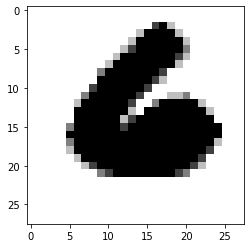

In [8]:
random_row = 500
digit = X[500, :].reshape(28,28)
plt.imshow(digit, matplotlib.cm.binary, interpolation='nearest')

Train a SGD classifier to check if digit is 5 or not. Use cross validation to determine model accuracy.
Note for a "never 5" classifier, we would be right 90% of the time. 

In [9]:
y_train_5 = (y_train==5)
sgd_clf = SGDClassifier(random_state = 42)
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring = 'accuracy')

We see a result of roughly 96% accuracy.

In [16]:
print(f'Mean = {scores.mean()*100:.1f}% +/- {scores.std()*100:.1f}%')

Mean = 96.4% +/- 0.3%


 A better way to understand the results is to use a confusion matrix. We use cross_val_predict to get predictions instead of scores.
 Then we generate our confusion matrix. 

In [20]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [21]:
conf_mat = confusion_matrix(y_train_5, y_train_pred)

Note for a confusion matrix, the first row is negative target and the first column is predicted negative.
Of course for a perfect classifier there would be zeros off the diagonal. 
Two figures of merit are the **precision** and **recall**. 
Think of precision as the accuracy when prediction is true and recall as the accuracy when actual is true. 
If you're too lazy to compute these yourself, of course you can use the build in functions


In [ ]:
from sklearn.metrics import precision_score, recall_scoree